In [1]:

import csv
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


GDP Data columns: Index(['Year - Month', 'Monthly Real GDP Index'], dtype='object')
Unemployment Data columns: Index(['DATE', 'UNRATE'], dtype='object')


<ipython-input-2-5f20e1c499a0>:16: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  gdp_data[gdp_date_column] = pd.to_datetime(gdp_data[gdp_date_column], infer_datetime_format=True)
<ipython-input-2-5f20e1c499a0>:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  gdp_data[gdp_date_column] = pd.to_datetime(gdp_data[gdp_date_column], infer_datetime_format=True)


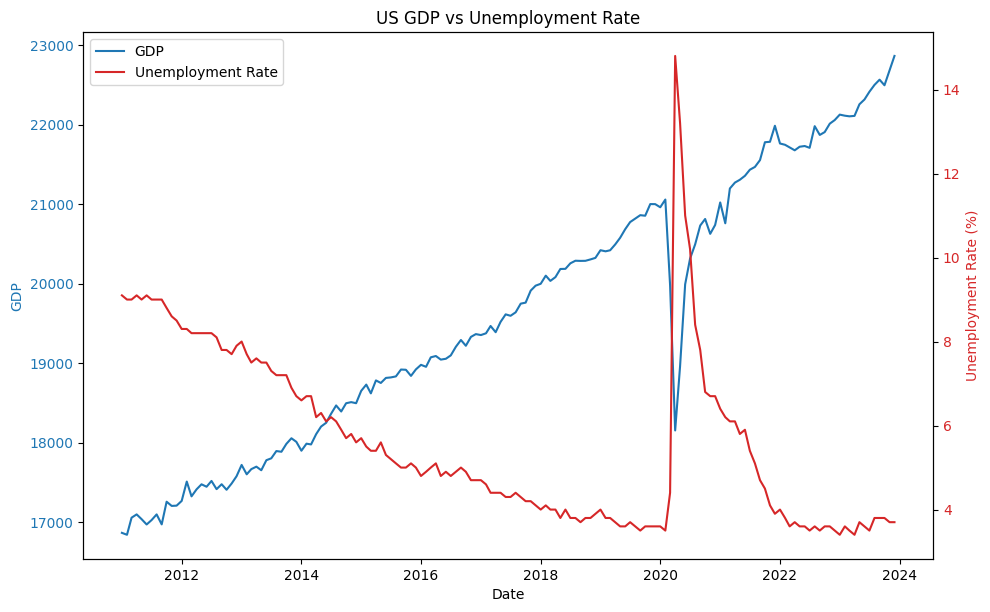

In [2]:
# VISUALIZATION 4:

# Load the data
gdp_data = pd.read_csv('/content/drive/MyDrive/CS418_Project_Pratik/data/USMonthlyGDP-2011-2023.csv')
unemployment_data = pd.read_csv('/content/drive/MyDrive/CS418_Project_Pratik/data/UnemploymentRate2011-2023.csv')

# Print the column names to check
print("GDP Data columns:", gdp_data.columns)
print("Unemployment Data columns:", unemployment_data.columns)

# Define date columns
gdp_date_column = 'Year - Month'
unemployment_date_column = 'DATE'

# Convert date columns to datetime format
gdp_data[gdp_date_column] = pd.to_datetime(gdp_data[gdp_date_column], infer_datetime_format=True)
unemployment_data[unemployment_date_column] = pd.to_datetime(unemployment_data[unemployment_date_column])

# Extract month and year for merging
gdp_data['Month'] = gdp_data[gdp_date_column].dt.month
gdp_data['Year'] = gdp_data[gdp_date_column].dt.year
unemployment_data['Month'] = unemployment_data[unemployment_date_column].dt.month
unemployment_data['Year'] = unemployment_data[unemployment_date_column].dt.year

# Merge the datasets on month and year
merged_data = pd.merge(gdp_data, unemployment_data, on=['Month', 'Year'], suffixes=('_gdp', '_unemployment'))

fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('GDP', color=color)
ax1.plot(merged_data[gdp_date_column], merged_data['Monthly Real GDP Index'], color=color, label='GDP')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Unemployment Rate (%)', color=color)
ax2.plot(merged_data[unemployment_date_column], merged_data['UNRATE'], color=color, label='Unemployment Rate')
ax2.tick_params(axis='y', labelcolor=color)

# Adding legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

fig.tight_layout()
plt.title('US GDP vs Unemployment Rate')
plt.show()



In [3]:
# After mounting Google Drive, the code retrieves and imports the required information in terms of types of data needed which include the US monthly GDP data and the Unemployment Rate data for the period of 2011 to 2023.
# Data consistency and integrity were ensured by verifying the columns that have been included in both datasets.
# By transforming the data into date-time formation objects, the code integrates the date format and makes analyzing time easier.
# To get the datasets ready for combining; it then extracts the month and year from the date and time objects.
# The code combines the two datasets into a single coherent dataset, which is essential for comparison analysis, using the month and year as common identifiers.
# Data analysis relies heavily on visual representation, and the code uses Matplotlib to plot the combined data in an attractive manner.
# In order to throw light on any possible connections or patterns; the resulting graphic compares the US GDP trend over time with the unemployment rate.
# The comparison is made easier by the use of two axes: the unemployment rate is plotted on the right y-axis and the GDP is plotted on the left which is x-axis.
# To ensure understanding, legends are used to differentiate between the two represented variables.

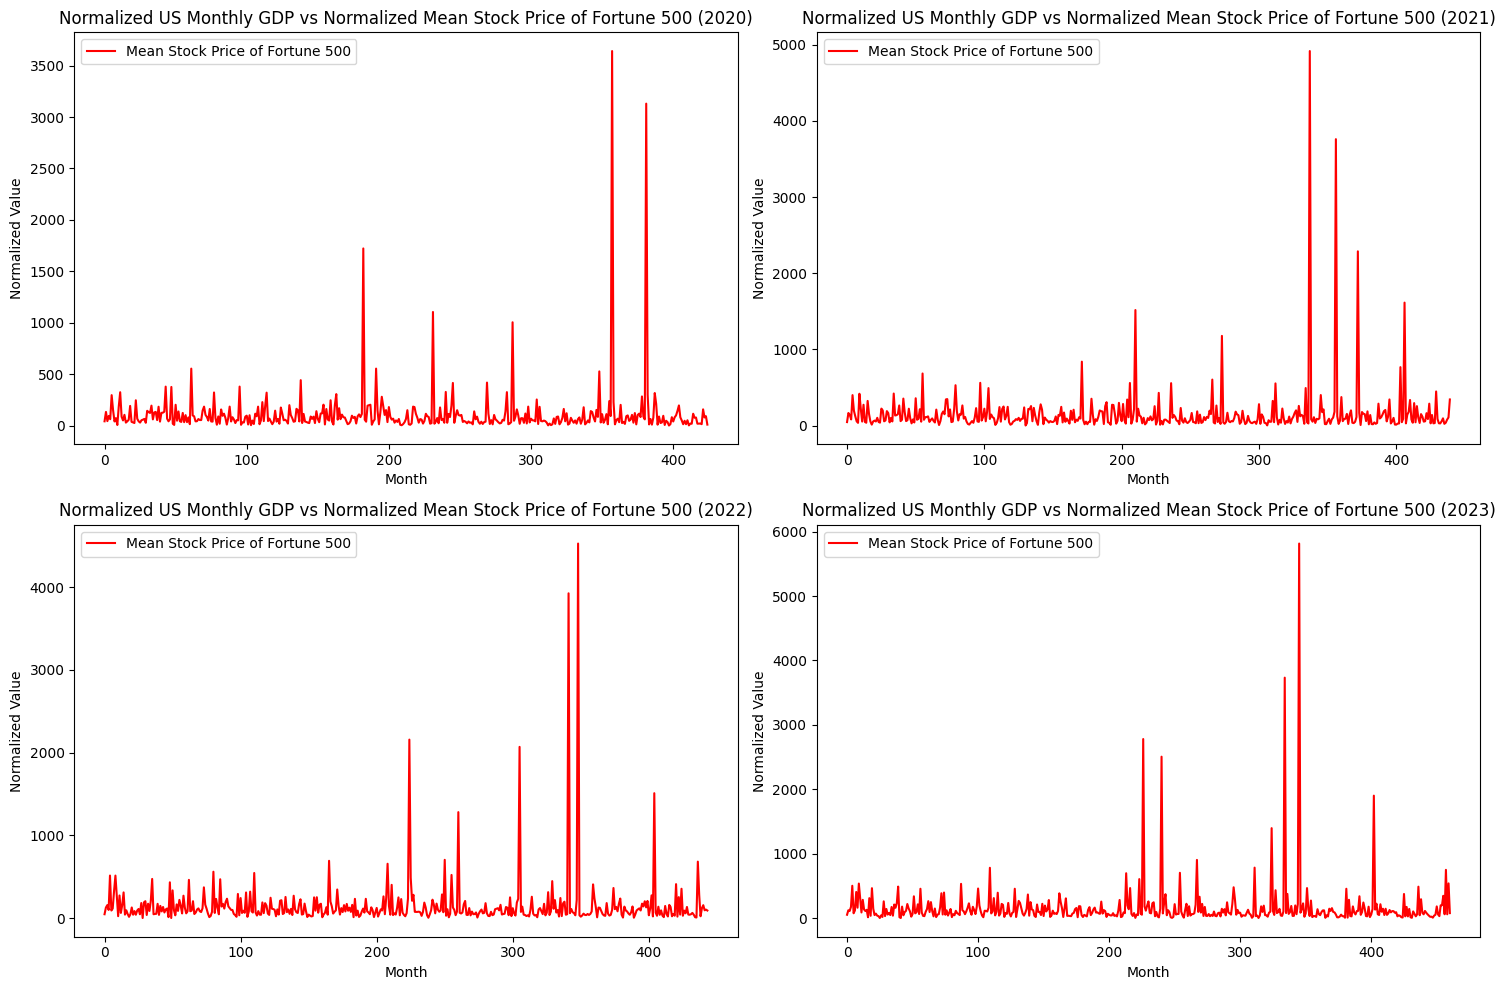

In [4]:
# VISUALIZATION 5:

# data = pd.read_csv(f'/content/drive/MyDrive/CS418_Project_Pratik/RawData/CleanedData/cleaned_data_{year}.csv')

import pandas as pd
import matplotlib.pyplot as plt

# Function to process data for a given year
def process_data(year, ax):
    # Read cleaned data
    data = pd.read_csv(f'/content/drive/MyDrive/CS418_Project_Pratik/RawData/CleanedData/cleaned_data_{year}.csv')

    # Normalize GDP and stock price data for each year
    gdp_columns = [col for col in data.columns if col.startswith('m-')]
    data[gdp_columns] = data[gdp_columns].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

    # Calculate mean stock price
    data['mean_stock_price'] = data.filter(regex=r'm\d+-o|m\d+-c', axis=1).mean(axis=1)

    # Plot normalized GDP data
    for gdp_column in gdp_columns:
        ax.plot(data.index, data[gdp_column], label=f'Normalized GDP ({gdp_column})')

    # Plot mean stock price
    ax.plot(data.index, data['mean_stock_price'], color='red', label='Mean Stock Price of Fortune 500')

    # Set labels and title
    ax.set_xlabel('Month')
    ax.set_ylabel('Normalized Value')
    ax.set_title(f'Normalized US Monthly GDP vs Normalized Mean Stock Price of Fortune 500 ({year})')

    # Display legend
    ax.legend(loc='upper left')

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Process data for each year from 2020 to 2023
for i, year in enumerate(range(2020, 2024)):
    process_data(year, axs[i // 2, i % 2])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()



In [5]:
# Comparison of Normalized US Monthly GDP and Mean Stock Price of Fortune 500 Companies
# This visualization presents data regarding the US Monthly GDP and the average stock price of Fortune 500 businesses using the Pandas and Matplotlib libraries.
# The input for the function process_data is an axis object and a year. It reads data that has been cleaned out of a CSV file that matches the specified year.
# The mean stock price for each month is computed after the GDP data for each year is adjusted. The mean stock price and the adjusted GDP statistics are then shown on a subplot.
# The function process_data is run for every year between 2020 and 2023, and the data is shown on a 2x2 grid of subplots.
# The month is shown on the x-axis, while the normalized value is shown on the y-axis.
# In every subplot, the normalized mean stock price of Fortune 500 businesses for a given year is compared with normalized GDP data.
# Which line reflects the mean stock price and which represents adjusted GDP data is shown by the legend.
# Lastly, a graphic is presented to show the correlation between the US Monthly GDP and the average stock price of Fortune 500 businesses throughout the given time frame.


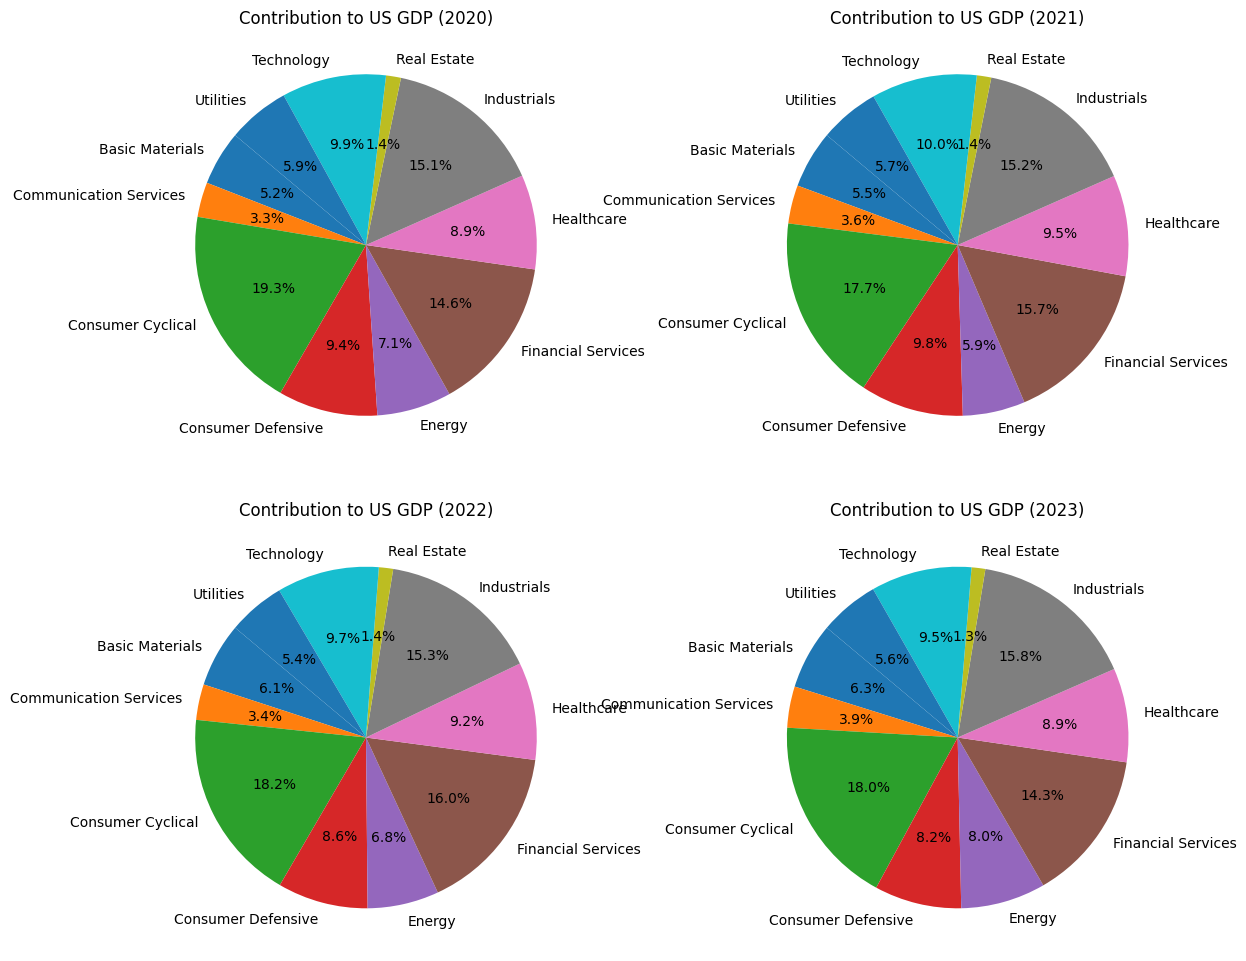

In [6]:
# VISUALIZATION 13:

# Show pie chart with what sectors and how much of which sectors are contributing to US GDP

# data = pd.read_csv(f'/content/drive/MyDrive/CS418_Project_Pratik/RawData/CleanedData/cleaned_data_{year}.csv')

import pandas as pd
import matplotlib.pyplot as plt

# Load the data for each year
years = ['2020', '2021', '2022', '2023']
dfs = [pd.read_csv(f'/content/drive/MyDrive/CS418_Project_Pratik/RawData/CleanedData/cleaned_data_{year}.csv') for year in years]

# Calculate total GDP for each sector across all years
sector_gdp_totals = []
for df in dfs:
    # Ensure numeric values for GDP columns
    df[['gdp-1', 'gdp-2', 'gdp-3', 'gdp-4', 'gdp-5', 'gdp-6', 'gdp-7', 'gdp-8', 'gdp-9', 'gdp-10', 'gdp-11', 'gdp-12']] = df[['gdp-1', 'gdp-2', 'gdp-3', 'gdp-4', 'gdp-5', 'gdp-6', 'gdp-7', 'gdp-8', 'gdp-9', 'gdp-10', 'gdp-11', 'gdp-12']].apply(pd.to_numeric, errors='coerce')

    # Sum numeric columns for each sector
    sector_gdp = df.groupby('Sector')[['gdp-1', 'gdp-2', 'gdp-3', 'gdp-4', 'gdp-5', 'gdp-6', 'gdp-7', 'gdp-8', 'gdp-9', 'gdp-10', 'gdp-11', 'gdp-12']].sum()

    # Sum across all sectors for each year
    sector_gdp_totals.append(sector_gdp.sum(axis=1))

# Create four pie charts
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()  # Flatten the axes array for easier iteration

for i, (year, sector_gdp) in enumerate(zip(years, sector_gdp_totals)):
    # Calculate total GDP for this year
    total_gdp = sector_gdp.sum()

    # Calculate contribution of each sector to total GDP for this year
    sector_contributions = sector_gdp / total_gdp

    # Plot pie chart
    axs[i].pie(sector_contributions, labels=sector_contributions.index, autopct='%1.1f%%', startangle=140)
    axs[i].set_title(f'Contribution to US GDP ({year})')

plt.tight_layout()
plt.show()



In [7]:
# Sectoral Contributions to US GDP
# Analyzing the various sectors' contributions to the US GDP offers important insights on the state and direction of the economy.
# Policymakers, investors, and companies may make well-informed decisions to promote sustainable development and reduce risks by knowing which sectors are driving economic growth.
# For example, if the GDP is regularly contributed to a large extent by specific industries, such as technology or healthcare, politicians may emphasize funding and policies that encourage innovation and research in these fields.
# In the same way, investors might strategically deploy capital, looking for growth prospects in industries that contribute significantly to the GDP.
# Additionally, companies may match their plans to the leading industries, which might boost their profitability and competitiveness.
# Furthermore, tracking shifts in sectoral contributions over time enables the detection of new trends and issues, directing preemptive actions to deal with changing economic dynamics.
# All things considered, examining the GDP's sectoral contributions is an essential tool for influencing economic policy, encouraging innovation, and guaranteeing the US will have sustained economic growth in the future.
